In [145]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import tifffile as tiff

In [207]:
torch.cuda.is_available()

True

In [9]:
img = cv2.imread("C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2013_Filtered.tif")

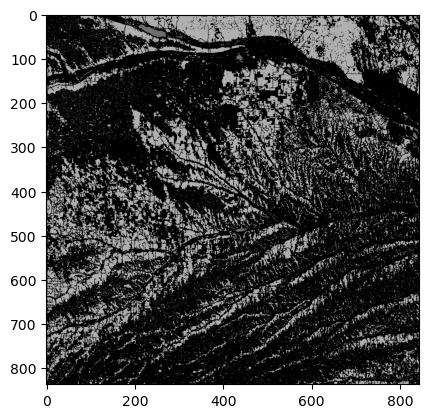

In [10]:
plt.imshow(img)

In [5]:
img.shape

(837, 845, 3)

In [9]:
img[800][300]

array([1, 1, 1], dtype=uint8)

In [70]:
img.max()

236

In [166]:
btemp = cv2.imread("C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF", cv2.IMREAD_ANYDEPTH)

In [167]:
btemp.shape

(837, 845)

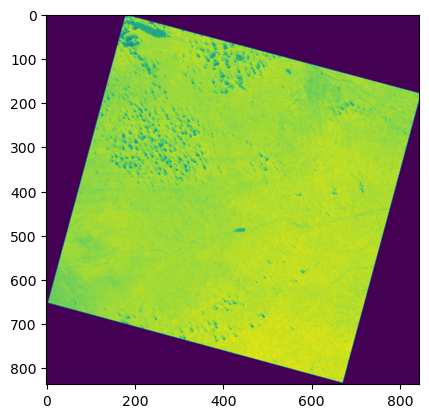

In [168]:
plt.imshow(btemp);

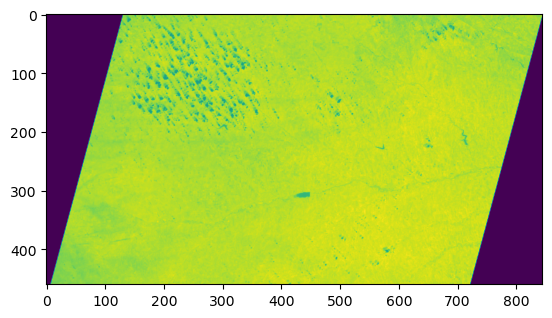

In [160]:
plt.imshow(btemp[180:640]);

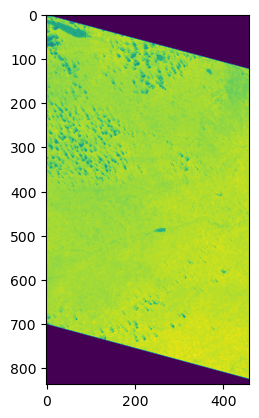

In [161]:
plt.imshow(btemp[:,180:640]);

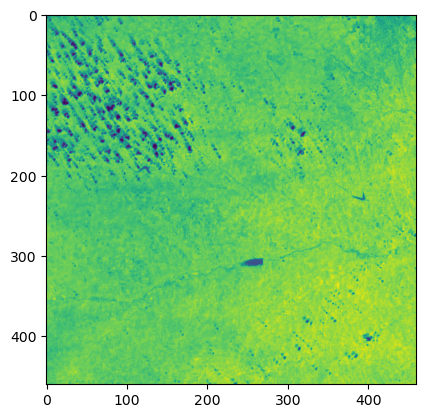

In [162]:
plt.imshow(btemp[180:640,180:640]);

(837, 845, 3)

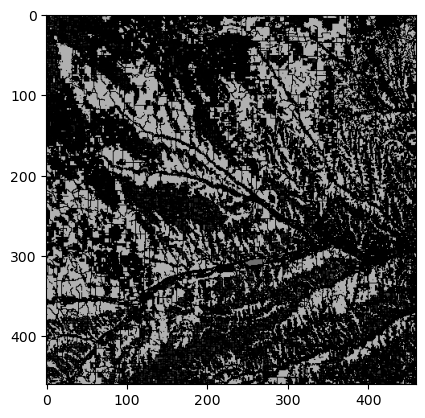

In [169]:
plt.imshow(img[180:640,180:640]);
img.shape

In [12]:
nocrop = [0,63,141,142,143,64,152,65,131,87,190,195,88,92,111,112,121,122,123,124,176]
nocrop

[0,
 63,
 141,
 142,
 143,
 64,
 152,
 65,
 131,
 87,
 190,
 195,
 88,
 92,
 111,
 112,
 121,
 122,
 123,
 124,
 176]

In [170]:
bt = btemp[180:640,180:640].copy()

In [44]:
imgcrop = img[180:640,180:640,0].copy()

In [16]:
mask = img[180:640,180:640,0].copy()

In [17]:
mask.shape

(460, 460)

In [18]:
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] in nocrop:
            mask[i,j]=0
        else:
            mask[i,j]=255

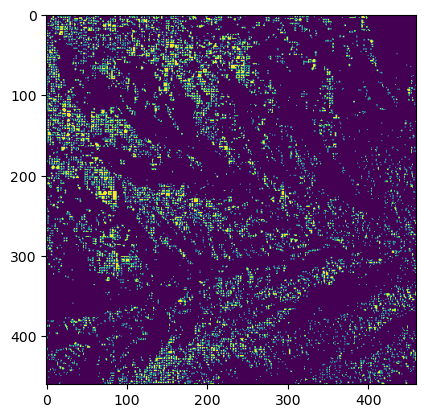

In [19]:
plt.imshow(mask);

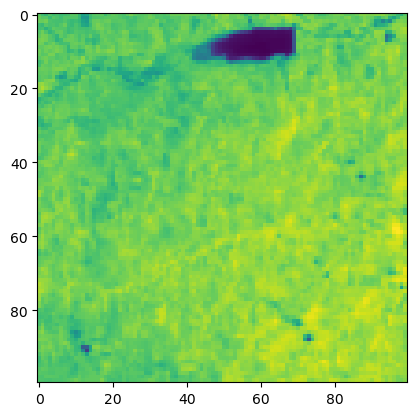

In [39]:
plt.imshow(bt[300:400,200:300]);

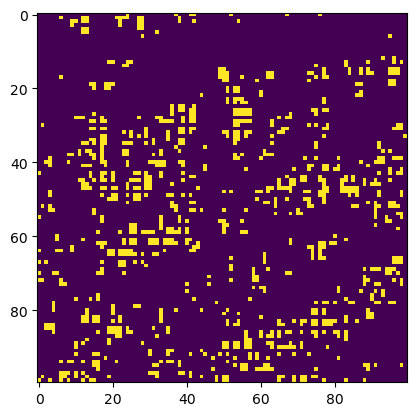

In [45]:
plt.imshow(mask[300:400,200:300]);

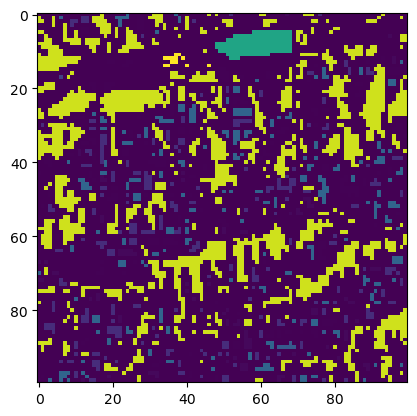

In [46]:
plt.imshow(imgcrop[300:400,200:300]);

In [10]:
img[180:640,180:640,0].shape

(460, 460)

In [32]:
btemp = cv2.imread("C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2014/LC08_L1TP_031032_20140102_20200912_02_T1_B10_BrightC_Resampled.tif", cv2.IMREAD_ANYDEPTH)

In [20]:
btemp[180:640,180:640].min()

5.9739504

In [47]:
import os

In [91]:
path = "C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/"
f = []
for (dirpath, dirnames, filenames) in os.walk(path):
    f.append(filenames)

In [101]:
f[1:11]

[['LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20130827_20200913_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20130928_20200912_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20131115_20200912_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20131217_20200912_02_T1_B10_BrightC_Resampled.TIF'],
 ['LC08_L1TP_031032_20140102_20200912_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20140118_20200912_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20140408_20200911_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20140424_20200911_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20140510_20200911_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20140526_20200911_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20140830_20200911_02_T1_B10_BrightC_Resampled.TIF',
  'LC08_L1TP_031032_20141017_20200910_02_T1_B10_BrightC_Resampled.TIF'],
 ['LC08_L1TP_031032_20150310_20200909_02_T1_B10_BrightC_Resamp

In [110]:
lc_path = "C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/"
lc = []
for (dirpath, dirnames, filenames) in os.walk(lc_path):
    lc.append(filenames)

In [117]:
lc[0]

['LC2013_Filtered.tif',
 'LC2014_Filtered.tif',
 'LC2015_Filtered.tif',
 'LC2016_Filtered.tif',
 'LC2017_Filtered.tif',
 'LC2018_Filtered.tif',
 'LC2019_Filtered.tif',
 'LC2020_Filtered.tif',
 'LC2021_Filtered.tif',
 'LC2022_Filtered.tif',
 'LC2022_Filtered.tif.aux.xml']

In [118]:
lc_path+lc[0][0]

'C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2013_Filtered.tif'

In [ ]:
final_images_path = "C:/Users/shubh/Notebook/Farmland/data/images/"
final_masks_path = "C:/Users/shubh/Notebook/Farmland/data/masks/"

In [180]:
for i in range(1,len(f)-1):
    for j in f[i]:
        
        #Define all file path
        year = i+2012
        img_path = path+str(year)+'/'+j
        date = j[17:25]
        mask_path = lc_path+lc[0][i-1]
        print(year,'\n',img_path,'\n',mask_path,'\n')
        
        #LOAD IMAGES
        print(img_path)
        print("C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF")
        btemp = cv2.imread(img_path, cv2.IMREAD_ANYDEPTH)
        mask = cv2.imread(mask_path)
        
        #CROP IN THE IMAGES
        bt = btemp[180:640,180:640].copy()
        mk = mask[180:640,180:640,0].copy()
        
        #SET NO CROP LABEL TO 0 AND CROP TO 1
        for m in range(mk.shape[0]):
            for n in range(mk.shape[1]):
                if mk[m,n] in nocrop:
                    mk[m,n]=0
                else:
                    mk[m,n]=255
                    
        #CROP IMAGES INTO 256 BY 256
        for p in range(0,201,20):
            for q in range(0,201,20):
                
                #SAVE IMAGES
                tiff.imsave(final_images_path+str(date)+'_'+str(p)+'_'+str(q)+'.tiff',bt[0+p:256+p,0+q:256+q].copy())
                tiff.imsave(final_masks_path+str(date)+'_'+str(p)+'_'+str(q)+'.tiff', mk[0+p:256+p,0+q:256+q].copy())
        
        
        
         

2013 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2013_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF


C:\Users\shubh\AppData\Local\Temp\ipykernel_30292\1353464208.py:34: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(final_images_path+str(date)+'_'+str(p)+'_'+str(q)+'.tiff',bt[0+p:256+p,0+q:256+q].copy())
C:\Users\shubh\AppData\Local\Temp\ipykernel_30292\1353464208.py:35: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(final_masks_path+str(date)+'_'+str(p)+'_'+str(q)+'.tiff', mk[0+p:256+p,0+q:256+q].copy())


2013 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130827_20200913_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2013_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130827_20200913_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF
2013 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130928_20200912_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2013_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130928_20200912_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_Br

2016 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2016/LC08_L1TP_031032_20160413_20200907_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2016_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2016/LC08_L1TP_031032_20160413_20200907_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF
2016 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2016/LC08_L1TP_031032_20160616_20200906_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2016_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2016/LC08_L1TP_031032_20160616_20200906_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_Br

2018 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2018/LC08_L1TP_031032_20180809_20200831_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2018_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2018/LC08_L1TP_031032_20180809_20200831_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF
2018 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2018/LC08_L1TP_031032_20180926_20200830_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2018_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2018/LC08_L1TP_031032_20180926_20200830_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_Br

2020 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2020/LC08_L1TP_031032_20200220_20200822_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2020_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2020/LC08_L1TP_031032_20200220_20200822_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF
2020 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2020/LC08_L1TP_031032_20200408_20200822_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2020_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2020/LC08_L1TP_031032_20200408_20200822_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_Br

2021 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2021/LC08_L1TP_031032_20211121_20211130_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2021_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2021/LC08_L1TP_031032_20211121_20211130_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_BrightC_Resampled.TIF
2021 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2021/LC08_L1TP_031032_20211207_20211215_02_T1_B10_BrightC_Resampled.TIF 
 C:/Users/shubh/Downloads/ComputerVisionProject-main/LandCover/LC2021_Filtered.tif 

C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2021/LC08_L1TP_031032_20211207_20211215_02_T1_B10_BrightC_Resampled.TIF
C:/Users/shubh/Downloads/ComputerVisionProject-main/BrightnessTemp/2013/LC08_L1TP_031032_20130421_20200913_02_T1_B10_Br

In [178]:
j[17:25]

'20221210'

In [210]:
bt = btemp[180:640,180:640].copy()

In [211]:
bt.shape

(460, 460)

In [128]:
bt.shape

(460, 460)

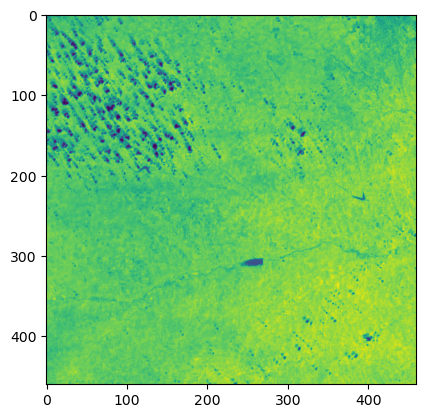

In [129]:
plt.imshow(bt)

In [152]:
count = 0
for i in range(0,201,20):
    for j in range(0,201,20):
        #print(i,j)
        print(0+i,256+i,0+j,256+j)
        count = count +1
        #bt[0+i:256+i,0+j:256+j]

0 256 0 256
0 256 20 276
0 256 40 296
0 256 60 316
0 256 80 336
0 256 100 356
0 256 120 376
0 256 140 396
0 256 160 416
0 256 180 436
0 256 200 456
20 276 0 256
20 276 20 276
20 276 40 296
20 276 60 316
20 276 80 336
20 276 100 356
20 276 120 376
20 276 140 396
20 276 160 416
20 276 180 436
20 276 200 456
40 296 0 256
40 296 20 276
40 296 40 296
40 296 60 316
40 296 80 336
40 296 100 356
40 296 120 376
40 296 140 396
40 296 160 416
40 296 180 436
40 296 200 456
60 316 0 256
60 316 20 276
60 316 40 296
60 316 60 316
60 316 80 336
60 316 100 356
60 316 120 376
60 316 140 396
60 316 160 416
60 316 180 436
60 316 200 456
80 336 0 256
80 336 20 276
80 336 40 296
80 336 60 316
80 336 80 336
80 336 100 356
80 336 120 376
80 336 140 396
80 336 160 416
80 336 180 436
80 336 200 456
100 356 0 256
100 356 20 276
100 356 40 296
100 356 60 316
100 356 80 336
100 356 100 356
100 356 120 376
100 356 140 396
100 356 160 416
100 356 180 436
100 356 200 456
120 376 0 256
120 376 20 276
120 376 40 296
12

In [153]:
count

121

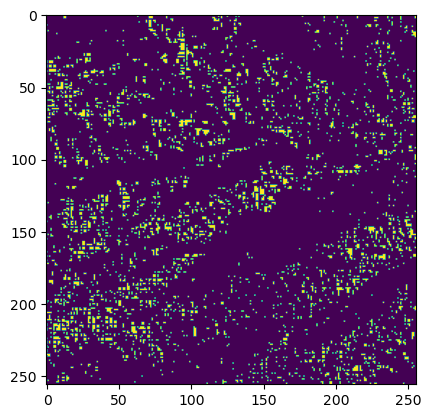

In [150]:
plt.imshow(mask[0+i:256+i,0+j:256+j])

In [149]:
tiff.imsave(final_images_path+'2013'+'_'+str(i)+'_'+str(j)+'.tiff',bt[0+i:256+i,0+j:256+j].copy())
tiff.imsave(final_masks_path+'2013'+'_'+str(i)+'_'+str(j)+'.tiff', mask[0+i:256+i,0+j:256+j].copy())

C:\Users\shubh\AppData\Local\Temp\ipykernel_30292\759725386.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(final_images_path+'2013'+'_'+str(i)+'_'+str(j)+'.tiff',bt[0+i:256+i,0+j:256+j].copy())
C:\Users\shubh\AppData\Local\Temp\ipykernel_30292\759725386.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(final_masks_path+'2013'+'_'+str(i)+'_'+str(j)+'.tiff', mask[0+i:256+i,0+j:256+j].copy())


In [189]:
image_path = 'C:/Users/shubh/Notebook/Farmland/data/images'
mask_path = 'C:/Users/shubh/Notebook/Farmland/data/masks'

In [191]:
X_train = []
for filename in os.listdir(image_path):
    img = cv2.imread(os.path.join(image_path,filename), cv2.IMREAD_ANYDEPTH)
    X_train.append(img)

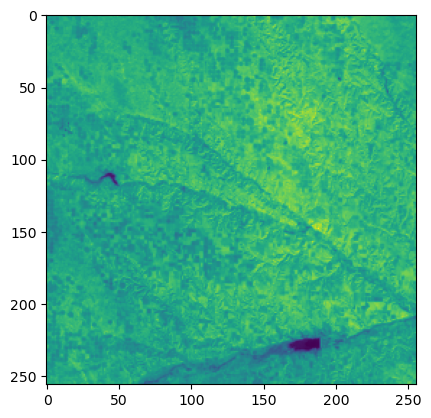

In [203]:
plt.imshow(X_train[10042])

In [199]:
Y_train = []
for filename in os.listdir(mask_path):
    img = cv2.imread(os.path.join(mask_path,filename))
    Y_train.append(img)

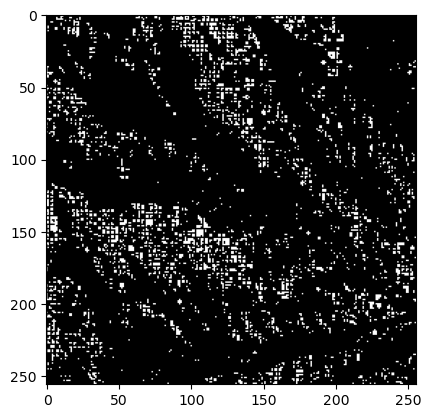

In [204]:
plt.imshow(Y_train[10042])

In [212]:
plt

SyntaxError: EOL while scanning string literal (2138251293.py, line 1)